# Presentation Demo of SCHEMA
## A framework for facilitating heterogeneous data interoperability.

Hello, and welcome to the Demonstration of the SCHEMA framework!

Let's go through a user use case scenario to really understand the power of this project in its realisation...

<div class="alert alert-warning">
<b>NOTE</b> This is one of three use cases highlighted in the report. Please see dissertation for further detail. 
</div>


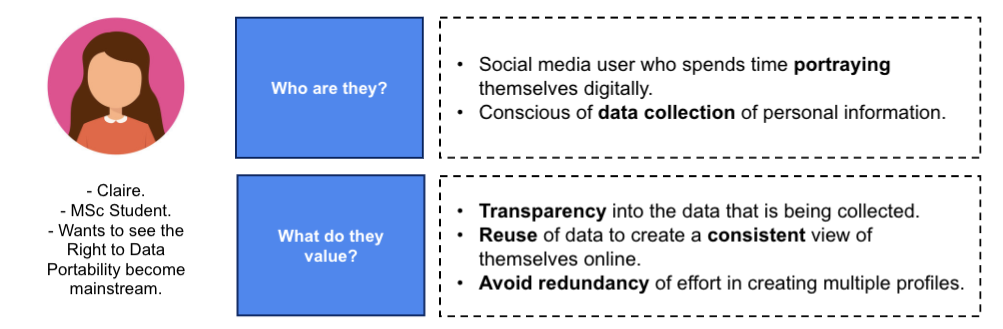

Now that there's an understanding of who the user in this instance is, let's take a look at the process she has to follow in order to port her data from Twitter to Facebook.

First, we need to __analyse__ the structure of the schemas that are downloaded.

## 1. Analysis of data provided under GDPR
As Claire wants to port her data from Twitter to Facebook, she needs to understand the source __and__ destination schemas, i.e. the Twitter and Facebook schemas provided.

In [1]:
import json
tpath = '/Users/clairefarrell/College/TCD/DISS/Twitter/tweet.js'
with open(tpath, 'r') as f:
    tjson_str = json.loads(f.read())

<div class="alert alert-block alert-info">
<b>Step 1</b> Read in the JSON objects from the downloaded archives. 
</div>

An example JSON object from Twitter is shown below.


In [2]:
tjson_str[0]

{'tweet': {'retweeted': False,
  'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>',
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'name': 'James',
     'screen_name': 'Pojken2014',
     'indices': ['0', '11'],
     'id_str': '2786152654',
     'id': '2786152654'},
    {'name': 'Data Protection Commission Ireland',
     'screen_name': 'DPCIreland',
     'indices': ['12', '23'],
     'id_str': '786180288900542464',
     'id': '786180288900542464'}],
   'urls': [{'url': 'https://t.co/RkiqDmOAR5',
     'expanded_url': 'https://forms.dataprotection.ie/contact',
     'display_url': 'forms.dataprotection.ie/contact',
     'indices': ['71', '94']}]},
  'display_text_range': ['0', '94'],
  'favorite_count': '0',
  'in_reply_to_status_id_str': '1301136726837125121',
  'id_str': '1301139972175654914',
  'in_reply_to_user_id': '2786152654',
  'truncated': False,
  'retweet_count': '0',
  'id': '1301139972175654914',
  'in_reply_to_status_i

<div class="alert alert-block alert-info">
<b>Step 2</b> Analyse the JSON object and its attributes.
</div>

After conceptual level, and attribute level analysis of the JSON object as detailed in the report. The following dataclass was created to formally represent a Tweet. The same process is followed for profile information and for the Facebook dataset.

In [3]:
from tweet import Tweet
Tweet()

Tweet(retweeted=None, source=None, favorite_count=None, in_reply_to_status_id=None, id_str=None, in_reply_to_user_id=None, truncated=None, retweet_count=None, id=None, in_reply_to_status_id_str=None, possibly_sensitive=None, created_at=None, favorited=None, full_text=None, lang=None, in_reply_to_screen_name=None, in_reply_to_user_id_str=None, entities=None, display_text_range=[])

<div class="alert alert-block alert-info">
<b>Step 3</b> Convert the JSON object to the relevant dataclass.
</div>

In [4]:
from tweet import Tweet, Entities, UserMentions, Urls, Main
tweetObjectList = []
for obj in tjson_str:
    tweetObjectList.append(Main(**obj))
tweetObjectList[0]

Main(tweet={'retweeted': False, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'name': 'James', 'screen_name': 'Pojken2014', 'indices': ['0', '11'], 'id_str': '2786152654', 'id': '2786152654'}, {'name': 'Data Protection Commission Ireland', 'screen_name': 'DPCIreland', 'indices': ['12', '23'], 'id_str': '786180288900542464', 'id': '786180288900542464'}], 'urls': [{'url': 'https://t.co/RkiqDmOAR5', 'expanded_url': 'https://forms.dataprotection.ie/contact', 'display_url': 'forms.dataprotection.ie/contact', 'indices': ['71', '94']}]}, 'display_text_range': ['0', '94'], 'favorite_count': '0', 'in_reply_to_status_id_str': '1301136726837125121', 'id_str': '1301139972175654914', 'in_reply_to_user_id': '2786152654', 'truncated': False, 'retweet_count': '0', 'id': '1301139972175654914', 'in_reply_to_status_id': '1301136726837125121', 'possibly_sensitive': False, 'created_at': 'Wed Sep 02 12:48:3

Now that the data is in the desired format for the matching process, its now time to port the data to the destination schema, i.e. the Facebook schema.

<div class="alert alert-warning">
    <b>NOTE</b> As aforementioned, the same efforts described above <b>must</b> be completed to progress to the next step, i.e. all of the schemas in the source and destination schemas must formally be represented by Python dataclasses. 
</div>

## 2. Matching Techniques

In order to create a baseline to evaluate the following matching techniques, a manual matching process was undertaken to capture what can be truly matched in a manual, domain-expert's manner. 

The process is documented in the report and displayed in a notebook with annotations of the reasoning behind the method and expectations of how the following automatic matching techniques will perform.

<div class="alert alert-warning">
    <b>NOTE</b> The time taken for each record to be matched is recorded and will be discussed in the Evaluation section of this notebook.
</div>



<div class="alert alert-block alert-info">
<b>Step 1</b> String Matching from Twitter to Facebook post schemas.
</div>

### String Matching
##### Introduction
String matching is the direct matching of the attributes based on their variable name. 

##### Methodology
1. Create an  instance of the source data, e.g. initialise an Twitter post class from the dictionary as demonstrated above.
2. Collect the annotations of these classes for comparison.
3. For every class in the Schema, create a new instance checking if a attribute exists in the source class instances using string matching and assigning the value accordingly if present.
4. Return the Schema object for analysis.

There are three methods employed and investigated as a part of this research: full string, partial string, and stemming and lemmatisation of the strings.

An example of stemming is reducing words like running, runs and run to their root form, run.

<div class="alert alert-block alert-success">
<b>Expectations</b> Given the different terminology used in the different organisations schema, the expectations are that string matching will not render favourable results in full string matches. With partial and root matching (matching using stemming), results should improve for some attributes that are common in schematic structures that have slight semantic differences, e.g. "screen_name" and "name", should match.
</div>

In [5]:
from string_match_facebook import Post1 as string_match_facebook_post
string_match_direct = string_match_facebook_post(vars(tweetObjectList[0])['tweet'])
string_match_direct

Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name=None, address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=None))), attachments=Attachments(data=[]), tags=[])


Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name='James', address=None, url='https://t.co/RkiqDmOAR5', coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url='https://t.co/RkiqDmOAR5'), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)

<div class="alert alert-block alert-info">
<b>Step 2</b> Semantic Matching from Twitter to Facebook post schemas.
</div>

### Semantic Matching
##### Intoduction
Semantic matching allows for words that mean the same thing to be matched together. This research employs the use of thesauri to match the attributes for different classes together. This methodology uses the schemas to find concepts from external data sources that are similar to it. 

i.e. From the Schemas, what similar concepts can be found from the source data, e.g. Twitter archive. 

##### Methodology
1. Create an  instance of the source data, e.g. initialise an Twitter post class from the dictionary as demonstrated above.
2. Collect the annotations of these classes for comparison.
3. Create a list of synonyms for each attrbibute in the Schema's classes.
4. For every class in the Schema, create a new instance checking if a attribute exists in the source class instances using semantic matching and assigning the value accordingly if present.
5. Return the Schema object for analysis.

<div class="alert alert-block alert-success">
<b>Expectations</b> Given that the terminology is, for the majority, representing similar concepts given that both schemas are originating from social media sites. Therefore, it is expected to perform much better than the String matching technique.
</div>

In [7]:
from sem_match_facebook import Post1 as sem_match_facebook_post
semantic_match_direct = sem_match_facebook_post(vars(tweetObjectList[0])['tweet'])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/clairefarrell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name=None, address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=None))), attachments=Attachments(data=[]), tags=[])


<div class="alert alert-block alert-info">
<b>Step 3</b> Pattern Matching from Twitter to Facebook post schemas.
</div>

### Pattern Matching
"Given two entities, if their children in their ontologies are similar, then it is likely the those entities are similar as well."
##### Introduction
Pattern matching involves the previous two matching techniques and combines them to output a matching score. Unlike the previous implementations, the matching is performed on the class as a whole, and not the individual attributes in isolation. 

##### Methodology
1. Empty instances of each class are initialised for the comparison.
2. Instances are added to a list of the overarching concept/organisation, i.e. all facebook classes are added to one list.
3. Two organisations are compared by _ the lists as parameters to the PatternMatching function. 
4. The PatternMatching function
    - The annotations for each class are collected.
    - Iterate through the classes in a nested manner.
    - In each iteration identify which class has the larger number of attributes, store this number.
    - For each attribute in the classes, create a list of synonyms for the variable name. 
    - Compare these lists and increase the semantic count score for every match found.
    - Similarly, compare the attributes on a string match bases, increasing the string match score for every match found.
    - Compute the similarity score for each class in the two lists and store this in a list of dictionaries.
        - e.g. [{class1:{class2:0.65, class3:0.3}]
            - class1 is more similar to class2 than class3 with a similarity score of 0.65 compared to 0.3.
            
<div class="alert alert-block alert-success">
<b>Expectations</b> The performance of the Pattern matching technique in the case of porting data from Twitter to Facebook is expected to be quite low. Whilst in other cases, it is believed that it should perform somewhat better. This is due to the vast difference in shapes between Twitter's and Facebook's schema. Although Twitter are including analytical information about each tweet and this may be beneficial to some technically able users, it may hinder results in this sense. 
</div>

In [8]:
from facebook_post import Coordinates, PhotoMetadata, MediaMetadata, Media, Place, ExternalContext, Data, Attachments, Post
from tweet import Tweet, Entities, UserMentions, Urls, Main
from pattern_match import PatternMatching

facebook_ls = [Coordinates(), PhotoMetadata(), MediaMetadata(), Media(), Place(), ExternalContext(), Data(), Attachments(), Post()]
tweet_ls = [Tweet(), Entities(), UserMentions(), Urls()]

pattern_twitter = PatternMatching(facebook_ls, tweet_ls)

print(PatternMatching(facebook_ls, tweet_ls))

[{'Coordinates': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}, {'PhotoMetadata': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}, {'MediaMetadata': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}, {'Media': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}, {'Place': {'Urls': 0.25, 'UserMentions': 0.2, 'Entities': 0.125, 'Tweet': 0.02631578947368421}}, {'ExternalContext': {'Urls': 0.25, 'Entities': 0.125, 'Tweet': 0.0, 'UserMentions': 0.0}}, {'Data': {'UserMentions': 0.07142857142857142, 'Tweet': 0.0, 'Entities': 0.0, 'Urls': 0.0}}, {'Attachments': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}, {'Post': {'Tweet': 0.0, 'Entities': 0.0, 'UserMentions': 0.0, 'Urls': 0.0}}]


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/clairefarrell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## 3. The Problem
Whilst this technique can be implemented on a per user basis, it can create a lot of redundant work. 
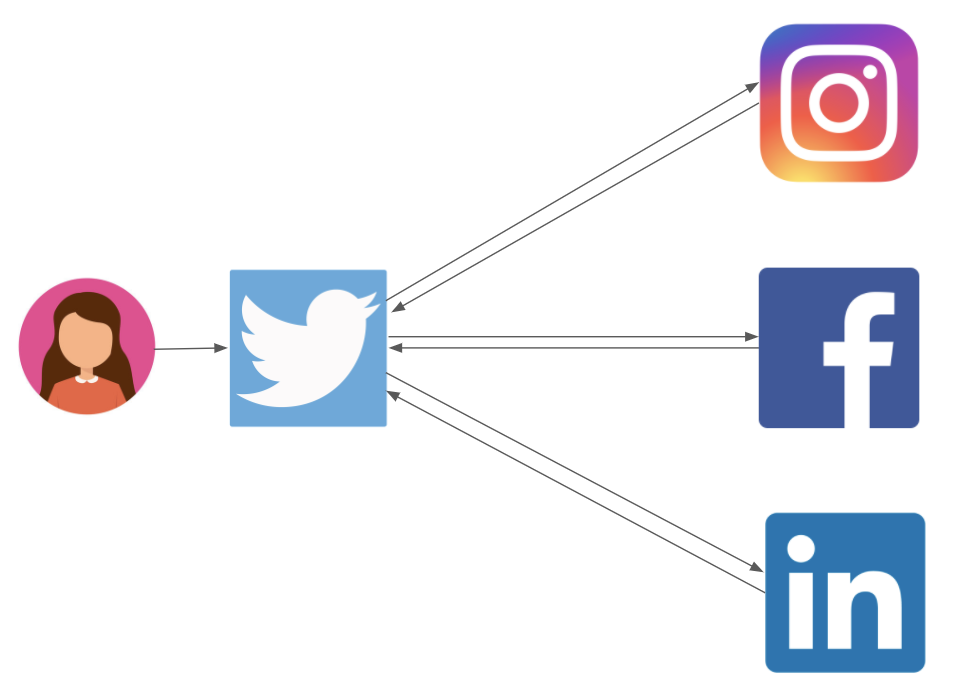
In the above example, Claire has transfered her data from Twitter schemas to Instagram, Facebook and LinkedIn. The mappings are tightly coupled and not reusable across other platforms. 

Now imagine a (certain and often occuring) scenario whereby Twitter change their schema slightly. Claire now has to update each component of the mapping process to comply with the new schema. 

To circumvent this issue, this research undertook the development of a generic schema named the Schema Adapter. The Schema Adapter acts as an intermediate step which source data is transformed to before being then transformed to the desired destination schema. 

## 4. The Schema Adapter
The Schema Adapter alleviates the above issue as if one schema changes, the user only has to change that one component to correctly match the schemas again. This can be altered at a community level and allows for a collaborative environment for data interoperability, rather than organisations working in small groups gatekeeping and siloing information.
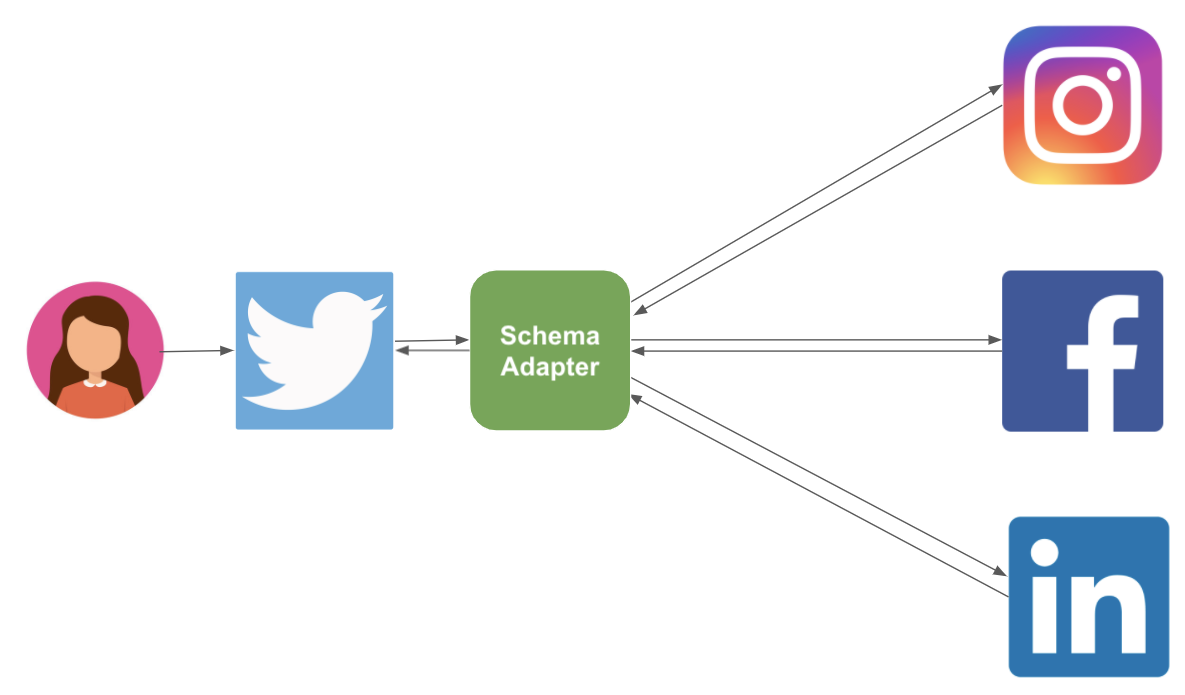
The Schema Adapter, is structured so that each vertical that exists in a schema is present, or can easily be extended for more verticals that may be present in the new schema.
<div class="alert alert-warning">
    <b>NOTE</b> A vertical is as defined by the Data Transfer Project as a concept type, e.g. Post, Photo, Playlist, etc.
</div>

In [6]:
from schema_adapter import Data as schema_adapter_data
schema_adapter_data()

Data(content=Content(text=TextualData(text=None, urls=None, hashtags=None, people=None), media=MediaData(url=None, id_str=None, caption=None, types=None), location=LocationData(name=None, address=None, url=None, coordinates=(0, 0))), profile=Profile(name=None, phone_number=None, emails=None, date_of_birth=None, gender=None, biography=None, language=None, location=LocationData(name=None, address=None, url=None, coordinates=(0, 0)), education=[], profession=[]), relationships=Relationships(relations=[]), interests=Interests(interests=[]), timestamp=None)

The same process that has been undertaken in the Matching Techniques phase, is now performed again with the intermittent Schema Adapter. 
<div class="alert alert-block alert-info">
<b>Step 1</b> String Matching from Twitter to Schema Adapter schemas.
</div>

In [10]:
import time
start_str = time.time()

from string_match import textData as str_data
string_twitter_indirect = str_data(vars(tweetObjectList[0])['tweet'])

end_str = time.time()
print(end_str - start_str)

Data(content=Content(text=TextualData(text=None, urls=None, hashtags=[], people=[]), media=MediaData(url=None, id_str=None, caption=None, types=None), location=LocationData(name=None, address=None, url=None, coordinates=(0.0, 0.0))), profile=None, relationships=None, interests=None, timestamp=1602850945)
0.0022840499877929688


In [11]:
string_twitter_indirect

TextualData(text="@Pojken2014 @DPCIreland Use the 'Raise a Concern' link on the homepage https://t.co/RkiqDmOAR5", urls=['https://t.co/RkiqDmOAR5'], hashtags=[], people=['@Pojken2014', '@DPCIreland'])

<div class="alert alert-block alert-info">
<b>Step 2</b> Semantic Matching from Twitter to Schema Adapter schemas.
</div>

In [12]:
start_sem = time.time()

from semantic_match import textData as sem_data
semantic_twitter_indirect = sem_data(vars(tweetObjectList[0])['tweet'])

end_sem = time.time()
print(end_sem - start_sem)

0.002500772476196289


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/clairefarrell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
semantic_twitter_indirect

TextualData(text=None, urls=None, hashtags=[], people=[])

<div class="alert alert-block alert-info">
<b>Step 3</b> Pattern Matching from Twitter to Schema Adapter schemas.
</div>

In [14]:
from schema_adapter import Data, LocationData, MediaData, TextualData, Content

schema_adapter_ls = [TextualData(), MediaData(), LocationData()]
tweet_ls = [Tweet(), Entities(), UserMentions(), Urls()]

pattern_twitter = PatternMatching(schema_adapter_ls, tweet_ls)

print(PatternMatching(schema_adapter_ls, tweet_ls))

[{'TextualData': {'Entities': 0.375, 'Urls': 0.125, 'Tweet': 0.0, 'UserMentions': 0.0}}, {'MediaData': {'Urls': 0.25, 'Entities': 0.125, 'UserMentions': 0.1, 'Tweet': 0.02631578947368421}}, {'LocationData': {'Urls': 0.25, 'UserMentions': 0.2, 'Entities': 0.125, 'Tweet': 0.02631578947368421}}]


## Evaluation of Matching techniques

In order to understand the effectiveness of the matching techniques, three metrics have been implemented.
1. Completeness
2. Performance
3. Achieves Research Objectives

### Completeness
Utilitsing the manual matching technique explored in the manual_matching_notebook as a baseline for what can be successfully mapped between the two schemas, the completeness of the three previously described matching techniques: string matching, semantic matching, and pattern matching. 

*What does completeness and percentage mean 
*Precision and Recall 
*How much of concepts were transformed (how good is the percentage)

##### Direct Matching
- From twitter tweet to facebook post completeness: 52.63%  
- From twitter profile to facebook profile completeness: 38.7% 
- From facebook post to twitter tweet completeness: 19.23% 
- From facebook profile to twitter profile completeness: 92.31% 

##### Indirect Matching
- From twitter to schema adapter: 78.37% completeness
- From facebook to schema adapter: 51.72% completeness

<div class="alert alert-warning">
    <b>NOTE</b> Completeness is measured by the percentage of attributes that have values assigned to them. As these values are automatically assigned using techniques explored previously, human validation is conducted on each attribute to ensure the completeness, precision, and recall are accurate. 
</div>

### Precision and Recall

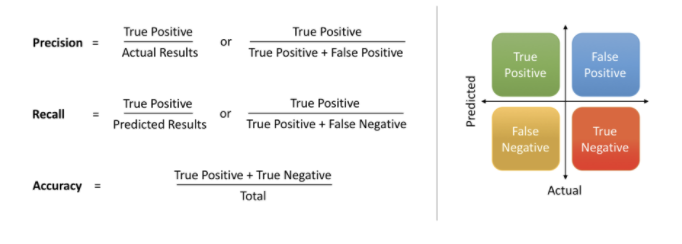

In [4]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

import json
def to_dict(obj):
    return json.loads(json.dumps(obj, default=lambda o: o.__dict__))

def completeness(new_dict):
    total = 0
    count = 0
    for k,v in flatten(to_dict(new_dict)).items():
        total+=1
        if v == None or len(v) == 0:
            count+=1
    return 1-count/total

def evaluation(true_pos, true_neg, false_pos, false_neg):
    total = true_pos + true_neg + false_pos + false_neg
    precision = true_pos/(true_pos+false_pos) if true_pos+false_pos else 0
    recall = true_pos/(true_pos+false_neg)
    accuracy = (true_pos+true_neg)/total
    return {"precision":precision, "recall":recall, "accuracy":accuracy}

In [8]:
to_dict(schema_adapter_data())

{'content': {'text': {'text': None,
   'urls': None,
   'hashtags': None,
   'people': None},
  'media': {'url': None, 'id_str': None, 'caption': None, 'types': None},
  'location': {'name': None,
   'address': None,
   'url': None,
   'coordinates': [0, 0]}},
 'profile': {'name': None,
  'phone_number': None,
  'emails': None,
  'date_of_birth': None,
  'gender': None,
  'biography': None,
  'language': None,
  'location': {'name': None,
   'address': None,
   'url': None,
   'coordinates': [0, 0]},
  'education': [],
  'profession': []},
 'relationships': {'relations': []},
 'interests': {'interests': []},
 'timestamp': None}

In [ ]:
Typess of matches

#### String Matching Completeness Direct

Evaluating the completeness of the string matching technique from the twitter to facebook schema.

<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [16]:
string_match_direct

Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name='James', address=None, url='https://t.co/RkiqDmOAR5', coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url='https://t.co/RkiqDmOAR5'), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)

<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [17]:
string_match_direct_completeness = completeness(string_match_direct)
string_match_direct_completeness

<ipython-input-15-dcd8fb800a4f>:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  if isinstance(v, collections.MutableMapping):


0.1578947368421053

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [18]:
true_pos = 1
true_neg = 11
false_pos = 5 
false_neg = 2

string_match_direct_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### String Matching Completeness Indirect

<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [19]:
string_twitter_indirect

TextualData(text="@Pojken2014 @DPCIreland Use the 'Raise a Concern' link on the homepage https://t.co/RkiqDmOAR5", urls=['https://t.co/RkiqDmOAR5'], hashtags=[], people=['@Pojken2014', '@DPCIreland'])

<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [20]:
string_twitter_indirect_completeness = completeness(string_twitter_indirect)
string_twitter_indirect_completeness

0.75

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [21]:
true_pos = 3
true_neg = 1
false_pos = 0 
false_neg = 0

string_twitter_indirect_eval = evaluation(true_pos, true_neg, false_pos, false_neg)
string_twitter_indirect_eval

{'precision': 1.0, 'recall': 1.0, 'accuracy': 1.0}

#### Semantic Matching Completeness Direct


<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [22]:
semantic_match_direct

Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name='James', address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)

<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [23]:
semantic_match_direct_completeness = completeness(semantic_match_direct)
semantic_match_direct_completeness

0.052631578947368474

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [24]:
true_pos = 0
true_neg = 13
false_pos = 1 
false_neg = 5

semantic_match_direct_eval = evaluation(true_pos, true_neg, false_pos, false_neg)
semantic_match_direct_eval

{'precision': 0.0, 'recall': 0.0, 'accuracy': 0.6842105263157895}

#### Semantic Matching Complteness Indirect

<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [25]:
semantic_twitter_indirect

TextualData(text=None, urls=None, hashtags=[], people=[])

<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [26]:
semantic_twitter_indirect_completeness = completeness(semantic_twitter_indirect)
semantic_twitter_indirect_completeness

0.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [27]:
true_pos = 0
true_neg = 1
false_pos = 0 
false_neg = 3

semantic_match_indirect_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

<div class="alert alert-block alert-info">
<b>Step 4</b> Compile results.
</div>

In [28]:
completeness_ls1 = ['real data',string_match_direct_completeness,string_twitter_indirect_completeness,semantic_match_direct_completeness,semantic_twitter_indirect_completeness]

eval_ls1 = ['real data', string_match_direct_eval,semantic_match_direct_eval,string_twitter_indirect_eval,semantic_match_indirect_eval]

### Dummy Data Test
The following section details the evaluation of the techniques given a schema that has each attribute included and containing meaningful values. 

In [29]:
tweet = Tweet(retweeted="false", 
              source="Android",
              favorite_count=13,
              in_reply_to_status_id="false",
              id_str="12345",
              in_reply_to_user_id="false",
              truncated="false",
              retweet_count=0,
              id=12345,
              in_reply_to_status_id_str="false",
              possibly_sensitive="false",
              created_at=1603805068,
              favorited="false",
              full_text="@Claire is doing her #dissertation :) www.tcd.ie",
              lang="en",
              in_reply_to_screen_name="false",
              in_reply_to_user_id_str="false",
              entities = Entities(user_mentions = [UserMentions(name = "@Claire", 
                                                                screen_name = "Claire",
                                                                id_str = "432",
                                                                id = 432,
                                                                indices = [0,6])], 
                                    hashtags = ["#dissertation"], 
                                    symbols = [":)"],
                                    urls = ["www.tcd1.ie"]),
              display_text_range = [])

For Demo purposes, change a key name to a needed attribute or partial match. 

In [30]:
tweet_dict = to_dict(tweet)
tweet_dict["full_text"] = tweet_dict.pop("full_text")
tweet = tweet_dict

#### String Direct Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [31]:
# String
dummy_string_match_direct = string_match_facebook_post(tweet)
print(dummy_string_match_direct)


Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name='@Claire', address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [32]:
dummy_string_match_direct_completeness = completeness(dummy_string_match_direct)
dummy_string_match_direct_completeness

0.052631578947368474

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [33]:
true_pos = 0
true_neg = 13
false_pos = 0 
false_neg = 6

dummy_string_match_direct_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### Semantic Direct Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [34]:
# Semantic
dummy_sem_match_direct = sem_match_facebook_post(tweet)
print(dummy_sem_match_direct)


Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name='@Claire', address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [35]:
dummy_sem_match_direct_completeness = completeness(dummy_sem_match_direct)
dummy_sem_match_direct_completeness

0.052631578947368474

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [36]:
true_pos = 0
true_neg = 13
false_pos = 1 
false_neg = 5

dummy_sem_match_direct_eval = evaluation(true_pos, true_neg, false_pos, false_neg)
dummy_sem_match_direct_eval

{'precision': 0.0, 'recall': 0.0, 'accuracy': 0.6842105263157895}

#### String Indirect Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [37]:
dummy_string_match_indirect = str_data(tweet)
print(dummy_string_match_indirect)


TextualData(text='@Claire is doing her #dissertation :) www.tcd.ie', urls=['www.tcd.ie'], hashtags=['#dissertation'], people=['@Claire'])


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [38]:
dummy_string_match_indirect_completeness = completeness(dummy_string_match_indirect)
dummy_string_match_indirect_completeness

1.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [39]:
true_pos = 4
true_neg = 0
false_pos = 0
false_neg = 0

dummy_string_match_indirect_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### Semantic Indirect Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [40]:
dummy_sem_match_indirect = sem_data(tweet)
print(dummy_sem_match_indirect)

TextualData(text=None, urls=None, hashtags=[], people=[])


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [41]:
dummy_sem_match_indirect_completeness = completeness(dummy_sem_match_indirect)
dummy_sem_match_indirect_completeness

0.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [42]:
true_pos = 0
true_neg = 0
false_pos = 0 
false_neg = 4

dummy_sem_match_indirect_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

<div class="alert alert-block alert-info">
<b>Step 4</b> Compile results.
</div>

In [43]:
completeness_ls2 = ["full text dummy data",dummy_string_match_direct_completeness,dummy_sem_match_direct_completeness,dummy_string_match_indirect_completeness,dummy_sem_match_indirect_completeness]

eval_ls2 = ["full text dummy data",dummy_string_match_direct_eval,dummy_sem_match_direct_eval,dummy_string_match_indirect_eval,dummy_sem_match_indirect_eval]

### Blind tweet test

Utilising the most popular twitter dataset on Kaggle, the techniques are evaluated against a new schema with from the same organisation.

Ref: https://www.kaggle.com/gpreda/covid19-tweets

In [44]:
import csv
path ="./covid19_tweets.csv"
newDictls = []
with open(path, 'r') as data:
    for line in csv.DictReader(data):
        newDictls.append(line)
test_tweet = newDictls[2]

In [45]:
test_tweet

{'user_name': 'Time4fisticuffs',
 'user_location': 'Pewee Valley, KY',
 'user_description': '#Christian #Catholic #Conservative #Reagan #Republican #Capitalist; Sports lover - #BBN #Cincinnati #Reds #Bengals #Trump2020',
 'user_created': '2009-02-28 18:57:41',
 'user_followers': '9275',
 'user_friends': '9525',
 'user_favourites': '7254',
 'user_verified': 'False',
 'date': '2020-07-25 12:27:14',
 'text': '@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3',
 'hashtags': "['COVID19']",
 'source': 'Twitter for Android',
 'is_retweet': 'False'}

#### String Direct Match

<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [46]:
test_a = string_match_facebook_post(test_tweet)
print(test_a)


Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name=None, address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [47]:
string_match_facebook_post_completeness = completeness(test_a)
string_match_facebook_post_completeness

0.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [48]:
true_pos = 0
true_neg = 12
false_pos = 0 
false_neg = 7

string_match_facebook_post_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### Semantic Direct Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [49]:
# Semantic
test_b = sem_match_facebook_post(test_tweet)
print(test_b)

Post(title=None, timestamp=None, data=Data(post=None, title=None, update_timestamp=None, timestamp=None, place=Place(name=None, address=None, url=None, coordinates=Coordinates(latitude=None, longitude=None)), external_context=ExternalContext(url=None), media=Media(uri=None, title=None, description=None, creation_timestamp=None, media_metadata=MediaMetadata(photo_metadata=PhotoMetadata(upload_ip=None)))), attachments=Attachments(data=None), tags=None)


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [50]:
sem_match_facebook_post_completeness = completeness(test_b)
sem_match_facebook_post_completeness

0.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [51]:
true_pos = 0
true_neg = 12
false_pos = 0 
false_neg = 7
sem_match_facebook_post_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### String Indirect Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [52]:
test_c = str_data(test_tweet)
print(test_c)

TextualData(text='@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3', urls=['https://t.co/Jkk8vHWHb3'], hashtags=['#COVID19'], people=['@diane3443', '@wdunlap', '@realDonaldTrump'])


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [53]:
sa_str_data_completeness = completeness(test_c)
sa_str_data_completeness

1.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [54]:
true_pos = 4
true_neg = 0
false_pos = 0 
false_neg = 0

sa_str_data_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

#### Semantic Indirect Match
<div class="alert alert-block alert-info">
<b>Step 1</b> Analyse mapping in destination schema
</div>

In [55]:
test_d = sem_data(test_tweet)
print(test_d)

TextualData(text='@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3', urls=['https://t.co/Jkk8vHWHb3'], hashtags=['#COVID19'], people=['@diane3443', '@wdunlap', '@realDonaldTrump'])


<div class="alert alert-block alert-info">
<b>Step 2</b> Measure completeness
</div>

In [56]:
sa_sem_data_completeness = completeness(test_d)
sa_sem_data_completeness

1.0

<div class="alert alert-block alert-info">
<b>Step 3</b> Measure precision, recall and accuracy.
</div>

In [57]:
true_pos = 4
true_neg = 0
false_pos = 0 
false_neg = 0

sa_sem_data_eval = evaluation(true_pos, true_neg, false_pos, false_neg)

<div class="alert alert-block alert-info">
<b>Step 4</b> Compile results.
</div>

In [58]:
completeness_ls3 = ["blind test data",
                    string_match_facebook_post_completeness,
                   sem_match_facebook_post_completeness,
                   sa_str_data_completeness,
                   sa_sem_data_completeness]

eval_ls3 = ["blind test data",
            string_match_facebook_post_eval,
           sem_match_facebook_post_eval,
           sa_str_data_eval,
           sa_sem_data_eval]

##### Data to table for analysis

In [59]:
data = [completeness_ls1, completeness_ls2, completeness_ls3]
labels = ["test" , "string direct", "semantic direct", "string indirect", "semantic indirect"]

import pandas as pd
df = pd.DataFrame(data,columns =labels)
df

,test,string direct,semantic direct,string indirect,semantic indirect
0,real data,0.157895,0.750000,0.052632,0.0
1,full text dummy data,0.052632,0.052632,1.000000,0.0
2,blind test data,0.000000,0.000000,1.000000,1.0


In [60]:
data = [eval_ls1, eval_ls2, eval_ls3]
labels = ["test" , "string direct", "semantic direct", "string indirect", "semantic indirect"]
df = pd.DataFrame(data,columns =labels)
m = pd.DataFrame([*df['string direct']], df.index).stack()\
      .rename_axis([None,'string direct Eval']).reset_index(1, name='String Direct')
n = pd.DataFrame([*df['string indirect']], df.index).stack()\
      .rename_axis([None,'string indirect Eval']).reset_index(1, name='String Indirect')
o = pd.DataFrame([*df['semantic direct']], df.index).stack()\
      .rename_axis([None,'semantic direct Eval']).reset_index(1, name='Semantic Direct')
p = pd.DataFrame([*df['semantic indirect']], df.index).stack()\
      .rename_axis([None,'semantic indirect Eval']).reset_index(1, name='Semantic Indirect')
out = df[['test']].join(m)
out1 = df[['test']].join(n)
out2 = df[['test']].join(o)
out3 = df[['test']].join(p)

out['Evaluation'] = out['test'] +'_'+ out['string direct Eval']
out = out.drop(['test', 'string direct Eval'], axis = 1)

out1['Evaluation'] = out1['test'] +'_'+ out1['string indirect Eval']
out1 = out1.drop(['test', 'string indirect Eval'], axis = 1)

out2['Evaluation'] = out2['test'] +'_'+ out2['semantic direct Eval']
out2 = out2.drop(['test', 'semantic direct Eval'], axis = 1)

out3['Evaluation'] = out3['test'] +'_'+ out3['semantic indirect Eval']
out3 = out3.drop(['test', 'semantic indirect Eval'], axis = 1)

df1 = out.merge(out1, how='inner',on='Evaluation')
df1 = df1.merge(out2, how='inner',on='Evaluation')
df1= df1.merge(out3, how='inner',on='Evaluation')

column_names=['Evaluation', 'String Direct', 'Semantic Direct', 'String Indirect', 'Semantic Indirect']
df2 = df1.reindex(columns=column_names)

In [61]:
df2

,Evaluation,String Direct,Semantic Direct,String Indirect,Semantic Indirect
0,real data_precision,0.166667,0.000000,1.0,0.00
1,real data_recall,0.333333,0.000000,1.0,0.00
2,real data_accuracy,0.631579,0.684211,1.0,0.25
3,full text dummy data_precision,0.000000,0.000000,1.0,0.00
4,full text dummy data_recall,0.000000,0.000000,1.0,0.00
5,full text dummy data_accuracy,0.684211,0.684211,1.0,0.00
6,blind test data_precision,0.000000,0.000000,1.0,1.00
7,blind test data_recall,0.000000,0.000000,1.0,1.00
8,blind test data_accuracy,0.631579,0.631579,1.0,1.00


<div class="alert alert-block alert-success">
<b>Analysis</b> The results in the above table show significant improvement in indirect mappings using the Schema Adapter over the direct mappings. The accuracy scores of the direct mappings seems to be quite high but this is as a product of the number of true negatives that exist in the destination schemas or concepts that aren't present in the source schema thus adding to the true negatives. There is inherent bias in the development of the Schema Adapter from the schemas that are used in this research, but as the blind test is conducted, it proves very effective scoring perfect accuracy.
</div>


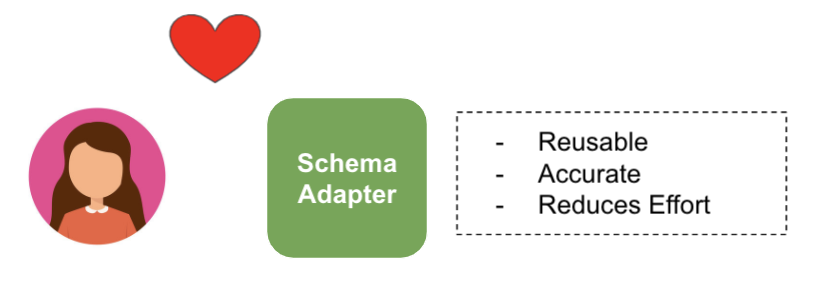

# Questions?

Thanks for listening :) 